In [1]:
import numpy as np
from mpl_toolkits import mplot3d
from cntxt import rom_am
from rom_am import ROM
import matplotlib.pyplot as plt

## Loading Data from simulation results

In [2]:
pist_pressure = np.loadtxt("../DATA/Fsi_Results/results_pres_fixed_dt.txt")
nnt = pist_pressure.shape[0]
fl_pressure = np.loadtxt("../DATA/Fsi_Results/results_pres_field_fixed_dt.txt").reshape((-1,nnt), order = 'F')
fl_rho_e = np.loadtxt("../DATA/Fsi_Results/results_rho_e_fixed_dt.txt").reshape((-1,nnt), order = 'F')
fl_rho_v = np.loadtxt("../DATA/Fsi_Results/results_rho_v_fixed_dt.txt").reshape((-1,nnt), order = 'F')
fl_velocity_end = np.loadtxt("../DATA/Fsi_Results/results_v_fixed_dt.txt").reshape((-1,nnt), order = 'F')
fl_rho = np.loadtxt("../DATA/Fsi_Results/results_rho_fixed_dt.txt").reshape((-1,nnt), order = 'F')
delta_t = np.loadtxt("../DATA/Fsi_Results/results_Delta_T_fixed_dt.txt")
fl_energy = fl_rho_e/fl_rho
fl_velocity = fl_rho_v/fl_rho

## ----------------------------------------------------------------------------------------------------------------------

## DMD Reduction

**DMD reduction on velocity**

In [3]:
## Parameters ----------------
rank = 0
dt = 2.53e-5
# Training data
X = fl_velocity[:, :-1]
Y = fl_velocity[:, 1::]

In [4]:
dmd = ROM("dmd")
dmd.decompose(X, Y, dt = dt, rank = rank, sorting="real")

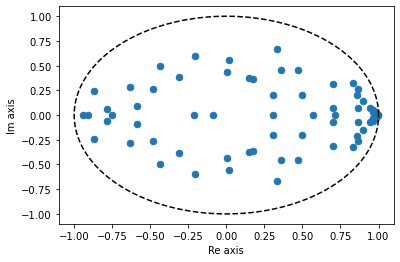

In [5]:
plt.plot(np.real(dmd.lambd), np.imag(dmd.lambd), '.', markersize = 13);
plt.xlabel("Re axis");
plt.ylabel("Im axis");
theta = np.linspace(0, 2*np.pi, 1024)
plt.plot(np.cos(theta), np.sin(theta), "k--");

## Reconstructing X
Reconstruct data using dmd on the first 151 instants

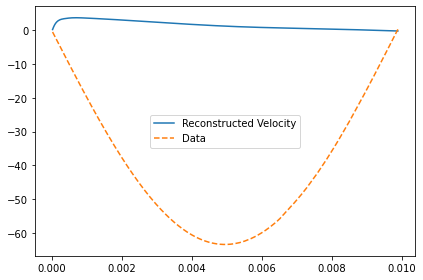

In [14]:
t = np.cumsum(delta_t)[0:-1]
predicted_X = np.real(dmd.dmd_predict(t, X[:, 0]))

plt.plot(t, predicted_X[-1, :], '-', label = "Reconstructed Velocity")
plt.plot(t, X[-1, :], '--', label = "Data");
plt.legend();
plt.tight_layout();